In [2]:
from keras.backend import dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.utils import plot_model

In [3]:
train_data_dir = 'C:/Users/avi11/Downloads/archive/Train Data'
test_data_dir = 'C:/Users/avi11/Downloads/archive/Test Data'

In [4]:
image_height, image_width = 150, 150
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,           
    rotation_range=20,           
    width_shift_range=0.2,       
    height_shift_range=0.2,      
    shear_range=0.2,             
    zoom_range=0.2,              
    horizontal_flip=True        
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='sparse' 
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='sparse'
)

Found 3990 images belonging to 4 classes.
Found 1222 images belonging to 4 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)), 
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(4, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
epochs = 30

model.fit(train_generator, epochs=epochs)

Epoch 1/30
105/125 [========================>.....] - ETA: 21s - loss: 1.3175 - accuracy: 0.3367

KeyboardInterrupt: 

In [1]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

NameError: name 'model' is not defined

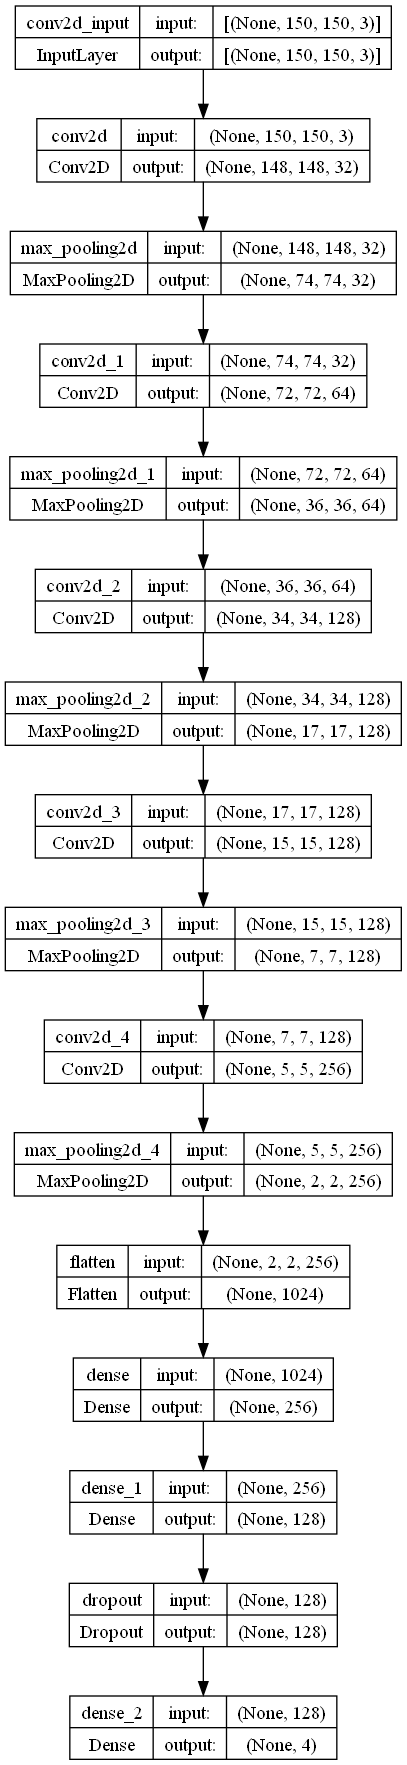

In [12]:
plot_model(model, to_file='model_graph.png', show_shapes=True)